# Supervised Machine Learning using Linear Regression

#### Student Marks Prediction

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df =  pd.read_csv("http://bit.ly/w-data")

df.shape

(25, 2)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Exploratory Data Analysis

In [5]:
# Data Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
## Preparing the Data

df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

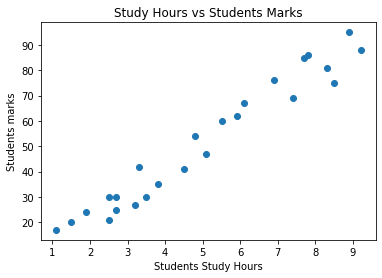

In [9]:
## Visualizing data

plt.scatter(x=df.Hours, y=df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Study Hours vs Students Marks")
plt.show()

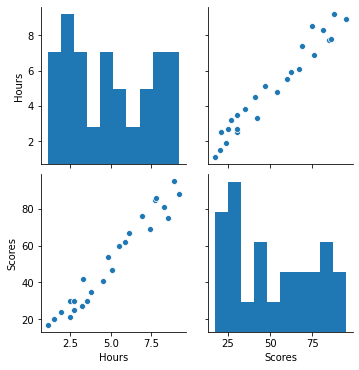

In [10]:
sns.pairplot(df)

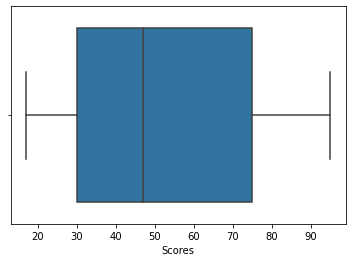

In [11]:
sns.boxplot(df["Scores"])

In [12]:
## Correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
## Split dataset

X = df.drop("Scores", axis="columns")
y = df.drop("Hours", axis="columns")

# X = df.iloc[:, :-1].values  
# y = df.iloc[:, 1].values

print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (25, 1)
Shape of y (25, 1)


In [14]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
## Split Dataset into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (20, 1)
Shape of y_train (20, 1)
Shape of X_test (5, 1)
Shape of y_test (5, 1)


### Applying ML Algorithm Linear Regression

In [16]:
## Select a model & train it
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
#coefficient
lr.coef_

array([[9.91065648]])

In [19]:
#intercept
lr.intercept_

array([2.01816004])

### Making Predictions

In [20]:
lr.predict([[6]])[0][0].round(2)

61.48

In [21]:
## Evaluationg the model

y_pred = lr.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [22]:
# Comparing Actual vs Predicted

pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=["study_hours","student_marks_org","student_marks_pred"])

,study_hours,student_marks_org,student_marks_pred
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [23]:
## Fine-tune model

lr.score(X_test,y_test)

0.9454906892105355

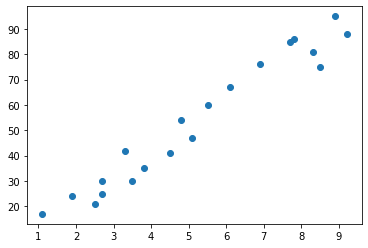

In [24]:
plt.scatter(X_train,y_train)

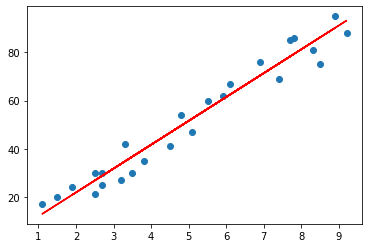

In [25]:
# Plotting the regression line
plt.scatter(X,y)
plt.plot(X_train, lr.predict(X_train), color="r")

### Evaluating the model

In [26]:
from sklearn import metrics  
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared  Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.18385989900298
Mean Squared  Error: 21.598769307217413
Root Mean Squared Error: 2.0454485813637504


### Save ML Model

In [27]:
import joblib

joblib.dump(lr, "student_mark_predictor_model.pkl")

['student_mark_predictor_model.pkl']

### Result

In [28]:
model = joblib.load("student_mark_predictor_model.pkl")

In [29]:
hours = [[9.25]]
result = model.predict([[9.25]])[0][0].round(2)
print("for {} hours of study,the predicted percentage score is {}".format(hours,result))

for [[9.25]] hours of study,the predicted percentage score is 93.69
